# Описание проекта

### Задача

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. 
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо. 
Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас. 
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся. 
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. 

**Наша задача — провести анализ и подготовить план действий по удержанию клиентов.**

А именно: 
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
   
       1) выделить целевые группы клиентов;
       2) предложить меры по снижению оттока;
       3) определить другие особенности взаимодействия с клиентами.

# Подключение библиотек и загрузка данных


Для начала исследования загрузим нужные нам библиотеки

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

Теперь загрузим наш датафрейм

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')
display(df.head(10))

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

# Предобработка данных

Как мы можем увидеть в названиях столбцов есть проблема с регистром, исправим это

In [4]:
df.columns = df.columns.str.lower()
print(df.columns)

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')


Посмотрим на столбцы, которые имеют значения 0 и 1, нет ли там никаких других значений

In [5]:
print(df['gender'].unique())
print(df['near_location'].unique())
print(df['partner'].unique())
print(df['promo_friends'].unique())
print(df['phone'].unique())
print(df['group_visits'].unique())
print(df['churn'].unique())

[1 0]
[1 0]
[1 0]
[1 0]
[0 1]
[1 0]
[0 1]


У всех этих столбцов тип данных int, заменим его на bool, так как кроме 0 и 1 других значений в них нет

In [6]:
df[['gender','near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn']] = df[['gender','near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn']].astype('bool')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   bool   
 1   near_location                      4000 non-null   bool   
 2   partner                            4000 non-null   bool   
 3   promo_friends                      4000 non-null   bool   
 4   phone                              4000 non-null   bool   
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   bool   
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

Проверим датафрейм на наличие дубликатов

In [8]:
df.duplicated().sum()

0

**Вывод**

На этом предобработка закончена. Поменяли типы данных там, где это требуется, проверили наличие дубликатов и привели названия столбцов к нижнему регистру. Пропусков в датафрейме не обнаружено.

# Исследовательский анализ данных (EDA)

**1.Посмотрим на датасет, изучим средние значения и стандартное отклонение с помощью метода describe()**

In [9]:
df.describe()

,contract_period,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,4.681250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052
std,4.549706,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906
min,1.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000
25%,1.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003
50%,1.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574
75%,6.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336
max,12.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783


**Вывод**

Данные нормальные, никаких выбросов нет, стандартное отклонение в большинстве столбцов близко к среднему значению.

**2.Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.**

In [10]:
df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
False,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
True,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


**Вывод**

Два столбца `gender` и `phone` не оказывают никакого влияния на отток клиентов. Оно и понятно, ведь гендер и наличие контактного телефона никак не влияют на то, ходишь ты в зал или нет.


Столбцы, которые имеют положительное влияние на клиентов(То есть отток меньше):
1) `partner`(среди партнеров фитнес-клуба отток клиентов меньше)

2) `promo_friends`(среди тех, кто пришел через друга также отток меньше)

3) `contract_period`(как минимум людей мотивирует ходить в зал то, что деньги уже заплачены за абонемент, поэтому отток меньше)

4) `group_visits`(групповые занятия также положительно влияют, возможно, люди начинают общаться с кем-то,и потом ходят вместе в зал)

5) `month_to_end_contract`(когда осталось немного до окончания абонемента, больше мотивации ходить)

6) `lifetime`(чем больше человек ходит, тем более привычным становится поход в зал)

7) `avg_class_frequency_current_month`(чем чаще ходит в неделю, тем привычнее ходить в зал в принципе)

У остальных столбцов влияние достаточно слабое.

**3.Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)**

Разделим колонки по типу данных для построения гистограмм
    

In [11]:
bool_column = [] 
dig_column = []

for column in df.columns:
    if df[column].dtype == 'bool':
        bool_column.append(column)
    else:
        dig_column.append(column)

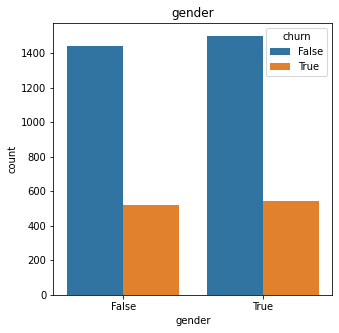

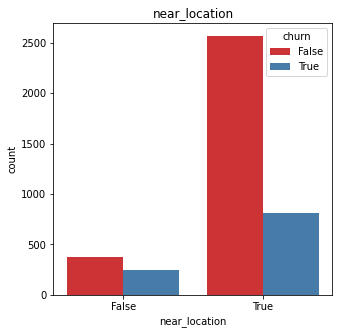

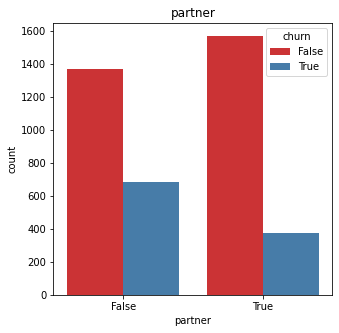

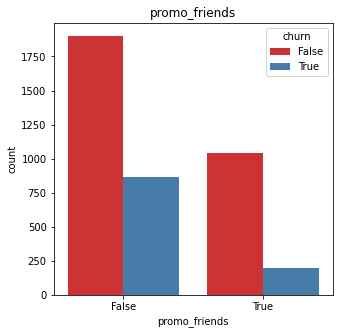

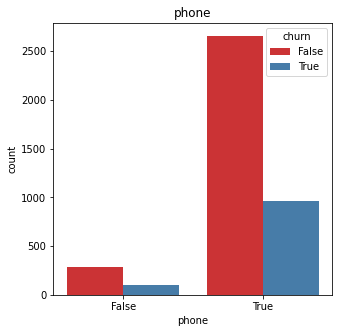

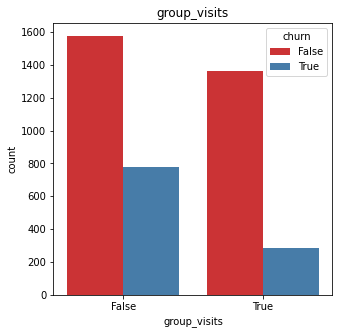

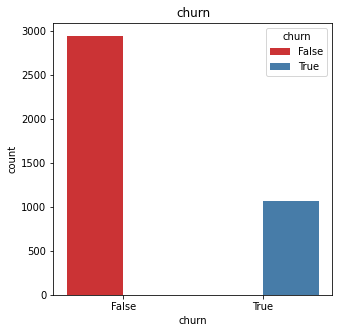

In [12]:
for column in bool_column:
    plt.figure(figsize=(5, 5))
    sns.countplot(data=df, x=column, hue="churn")
    sns.set_palette('Set1')
    plt.title(column)
    plt.show()

- Мужчин больше, но отток и у женщин, и у мужчин примерно одинаковый
- Тех людей, кто живет рядом значительно больше, но и отток больше естественно
- Среди партнеров отток меньше
- Участников акций меньше, но и отток намного меньше
- Телефон оставиили большинство людей, но на отток не особо влияет
- Те, кто ходит на групповые занятия остаются клиентами фитнес-клуба

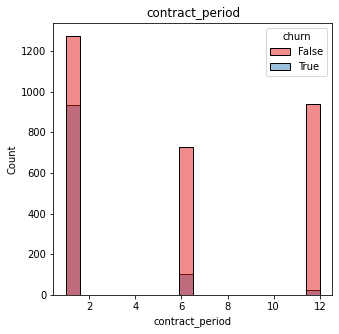

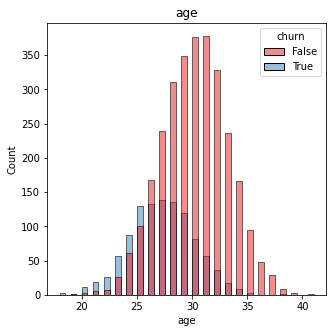

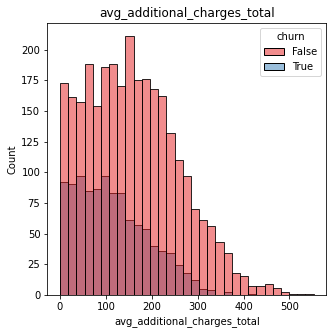

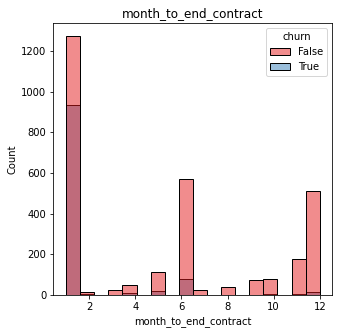

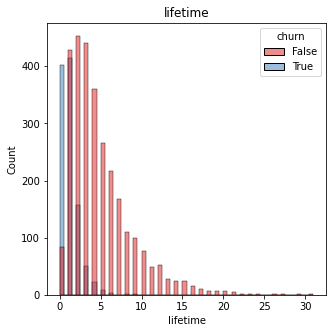

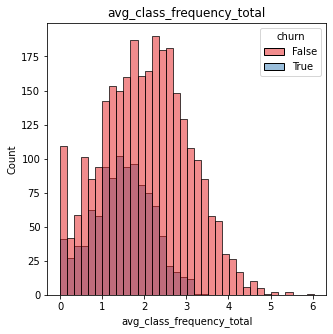

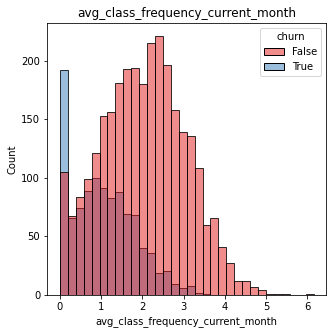

In [13]:
for column in dig_column:
    plt.figure(figsize=(5, 5))
    sns.histplot(data=df, x=column, hue="churn")
    sns.set_palette('Set1')
    plt.title(column)
    plt.show()

- Чем дольше абонемент в зал, тем меньше отток
- Основной отток клиентов в возрасте от 25 до 30 лет
- Отток клиентов не сильно зависит от выручки с дополнительных услуг фитнес-зала 
- Основной отток идет от клиентов, у которых остался последний месяц абонемента
- Основной отток идет от клиентов, которые ходили до 2 месяцев, затем отток падает практически до нуля
- Виден отток если клиент ходит от 1 или 2 раза в неделю, а вот те, кто ходит больше 3 раз оттока практически нет
- Чем чаще в месяц ходит клиент, тем меньше отток

**4.Построим матрицу корреляций и отобразим её.**

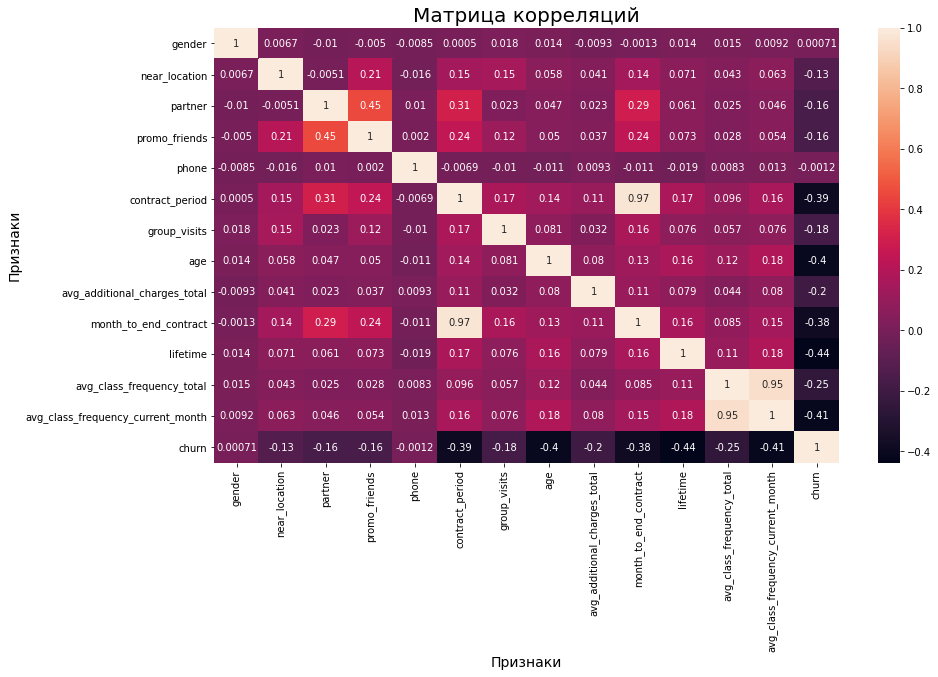

In [14]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot = True, square=False)
plt.title('Матрица корреляций', fontsize = 20)
plt.xlabel('Признаки', fontsize = 14) 
plt.ylabel('Признаки', fontsize = 14) 
plt.show()

Как мы можем увидеть по корреляционной матрице, первые 5 признаков почти не коррелируют с оттоком клиентов, то есть не влияют на отток. Более менее сильное влияние оказывают `contract_period`, `age`, `month_to_end_contract`, `lifetime` и `avg_class_frequency_current_month`. Корреляция отрицаительная, так как чем она ближе к -1, тем отток меньше.

## Общий вывод

Построили гистограммы по каждому признаку в зависимости от оттока клиентов, а также построили корреляцционную матрицу. 
1) 2 признака никак не влияют на отток клиентов

2) 5 признаков хорошо коррелируют с оттоком

3) все коэффициенты корреляции отрицательные

# Построение модели прогнозирования оттока клиентов

**1.Разобьем данные на обучающую и валидационную выборку функцией train_test_split()**

Так как у нас нет временного ряда, то разбиение будет случайным

In [15]:
X = df.drop('churn', axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train) 
display(X_train_st[:5])


X_test_st = scaler.transform(X_test)

array([[-1.01511421,  0.4175068 ,  1.03175391,  1.4800097 ,  0.31628211,
         1.60502986, -0.84769226,  0.57944798,  0.37161711,  1.59173796,
         1.12734972,  1.75580418,  1.61822807],
       [-1.01511421,  0.4175068 , -0.96922337, -0.67567125,  0.31628211,
        -0.81299073, -0.84769226,  0.27046055, -1.09697378, -0.79568246,
         5.88138322, -0.2239674 , -0.01340886],
       [ 0.98511083,  0.4175068 ,  1.03175391, -0.67567125,  0.31628211,
         1.60502986, -0.84769226, -0.65650171, -1.18374157,  1.83048   ,
         0.3350108 , -0.84308456, -0.80541199],
       [-1.01511421,  0.4175068 ,  1.03175391,  1.4800097 ,  0.31628211,
         0.28610954, -0.84769226, -0.96548914, -0.95158829,  0.39802775,
         1.39146269,  0.66771379,  0.64605224],
       [-1.01511421,  0.4175068 , -0.96922337, -0.67567125, -3.16173427,
        -0.81299073, -0.84769226, -0.03852687,  0.97190435, -0.79568246,
         0.07089783, -0.19587934, -0.16038147]])

**2.Обучите модель на train-выборке способами логистической регрессией и случайным лесом**

In [16]:
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('acc' , accuracy_score(y_test, y_pred))
    print('precision' , precision_score(y_test, y_pred))
    print('recall' , recall_score(y_test, y_pred))
models = [
    LogisticRegression(random_state=0),
    RandomForestClassifier(random_state=0)
]
for i in models:
    print(i)
    make_prediction(
        m=i,
        X_train=X_train_st,
        y_train=y_train,
        X_test=X_test_st,
        y_test=y_test,
    )

LogisticRegression(random_state=0)
acc 0.9225
precision 0.8541666666666666
recall 0.8282828282828283
RandomForestClassifier(random_state=0)
acc 0.915
precision 0.8385416666666666
recall 0.8131313131313131


**3.Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?**

По всем трем показателям немного лучше оказалась модель логистической регрессии, но разница со случайным лесом совсем небольшая.

# Кластеризация клиентов

**1.Стандартизируем данные**

In [17]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc[:3]

array([[ 0.97970588,  0.42788074,  1.02686062,  1.49716101, -3.05985201,
         0.28989014,  1.19403206, -0.0565538 , -1.37753121,  0.16160501,
        -0.19332863, -1.91191971, -1.67847198],
       [-1.0207145 ,  0.42788074, -0.973842  , -0.66793083,  0.32681319,
         1.60882159,  1.19403206,  0.55732732, -0.35021325,  1.83194105,
         0.87368001,  0.04517569,  0.1360137 ],
       [-1.0207145 ,  0.42788074,  1.02686062, -0.66793083,  0.32681319,
        -0.8092194 , -0.83749845, -0.36349436, -0.1815923 , -0.79287273,
        -0.46008079, -0.02049263, -0.02901851]])

**2.Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму.**

In [18]:
linked = linkage(X_sc, method = 'ward')
linked

array([[9.70000000e+01, 3.22200000e+03, 1.00990653e-01, 2.00000000e+00],
       [2.61000000e+02, 3.17900000e+03, 1.22634574e-01, 2.00000000e+00],
       [8.90000000e+02, 1.75000000e+03, 1.28123291e-01, 2.00000000e+00],
       ...,
       [7.98700000e+03, 7.99500000e+03, 8.38725499e+01, 2.65600000e+03],
       [7.98800000e+03, 7.99600000e+03, 8.89563592e+01, 3.03400000e+03],
       [7.99200000e+03, 7.99700000e+03, 1.04627601e+02, 4.00000000e+03]])

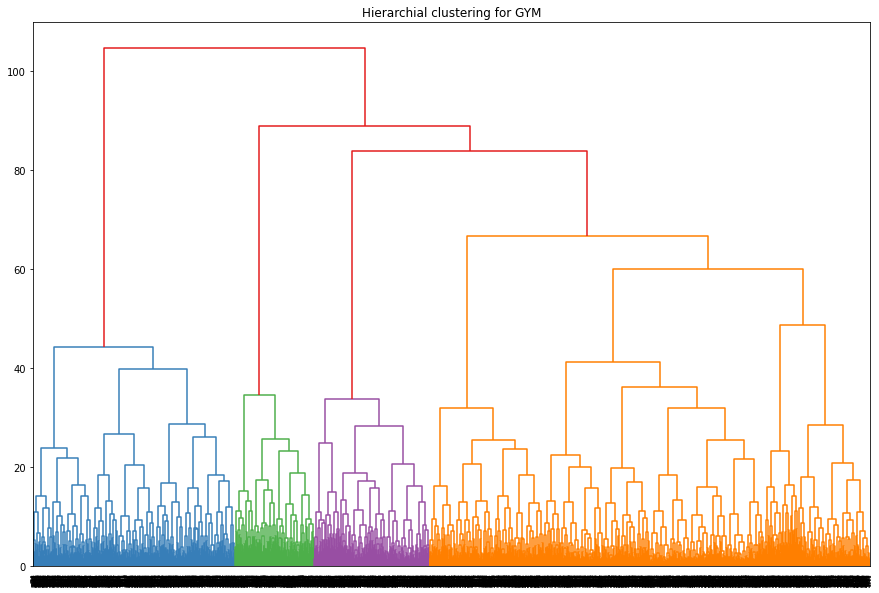

In [19]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()

Получаем из дендрограммы, что можем выделить 6 кластеров

**3.Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами**

In [20]:
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(X_sc) 
labels

array([1, 0, 3, ..., 0, 0, 1], dtype=int32)

In [21]:
df['cluster_km'] = labels
display(df.head(10))

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster_km
0,True,True,True,True,False,6,True,29,14.227470,5.0,3,0.020398,0.000000,False,1
1,False,True,False,False,True,12,True,31,113.202938,12.0,7,1.922936,1.910244,False,0
2,False,True,True,False,True,1,False,28,129.448479,1.0,2,1.859098,1.736502,False,3
3,False,True,True,True,True,12,True,33,62.669863,12.0,2,3.205633,3.357215,False,0
4,True,True,True,True,True,1,False,26,198.362265,1.0,3,1.113884,1.120078,False,3
5,True,True,False,False,True,1,True,34,450.743960,1.0,3,2.623477,2.637007,False,4
6,True,True,True,True,False,6,True,32,94.266389,6.0,2,1.138941,1.277242,False,1
7,False,True,False,False,True,1,False,30,217.786641,1.0,0,1.213502,1.049387,True,3
8,True,True,True,True,True,1,True,23,45.409909,1.0,1,1.106239,1.059333,False,3
9,False,True,False,False,True,1,False,31,65.310836,1.0,11,1.810852,1.951368,False,4


**4.Посмотрим на средние значения признаков для кластеров. Можно ли сразу что-то заметить?**

In [22]:
print(df.groupby('cluster_km').mean().T)

cluster_km                                  0           1           2  \
gender                               0.502970    0.522078    0.495050   
near_location                        0.959406    0.862338    0.000000   
partner                              0.783168    0.470130    0.463366   
promo_friends                        0.574257    0.306494    0.079208   
phone                                1.000000    0.000000    1.000000   
contract_period                     10.889109    4.787013    2.352475   
group_visits                         0.542574    0.425974    0.215842   
age                                 29.982178   29.301299   28.477228   
avg_additional_charges_total       160.761016  143.957664  135.457501   
month_to_end_contract                9.954455    4.475325    2.198020   
lifetime                             4.736634    3.924675    2.809901   
avg_class_frequency_total            1.982055    1.847220    1.660461   
avg_class_frequency_current_month    1.974789    1.

В нулевом кластере в основном клиенты, которые близко живут(95%), являются партнерами(78%) и имеют годовой абонемент

В первом кластере находятся все люди, которые не оставили свой номер телефона

Во втором кластере люди, которые живут далеко от фитнес-зала, пришли не через акцию и не люябт групповые занятия

В третьем кластере люди, которые ходят в зал раз в неделю

А вот в четвертом кластере люди ходят в зал 3 раза в неделю, поэтому данный кластер кластер имеет минимальный отток

**5.Построим распределения признаков для кластеров. Можно ли что-то заметить по ним?**

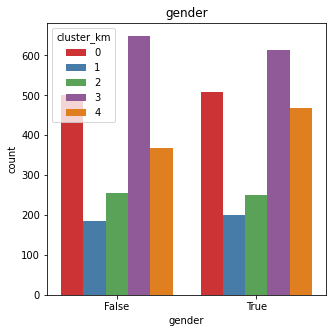

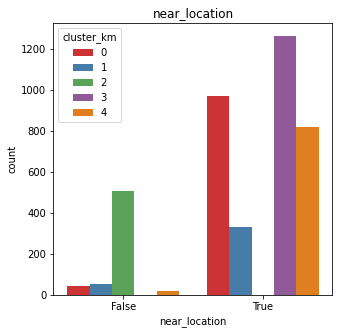

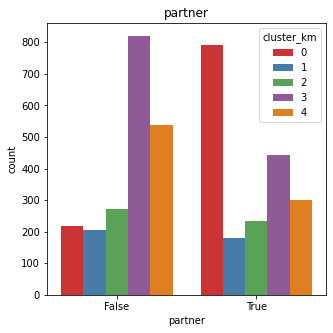

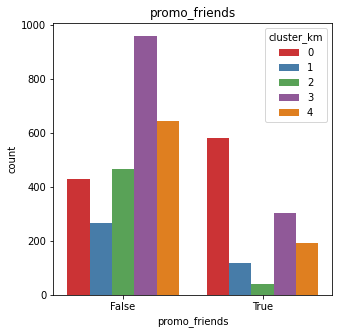

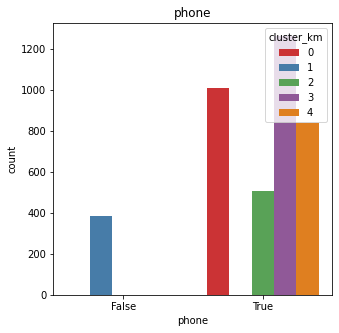

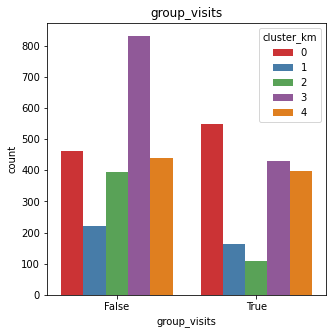

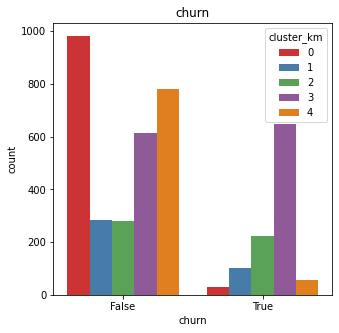

In [23]:
for column in bool_column:
    plt.figure(figsize=(5, 5))
    sns.countplot(data=df, x=column, hue="cluster_km")
    sns.set_palette('Set1')
    plt.title(column)
    plt.show()

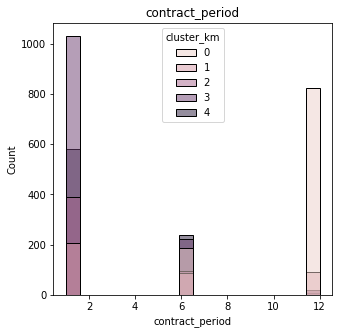

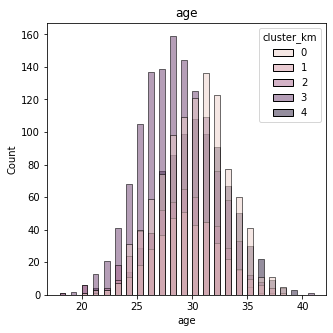

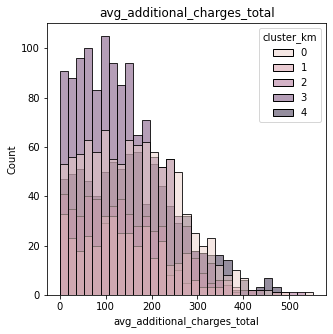

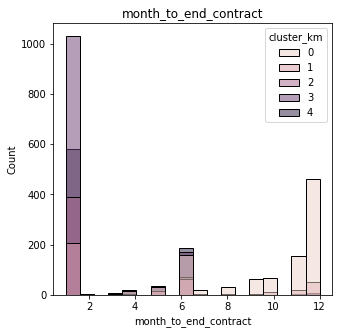

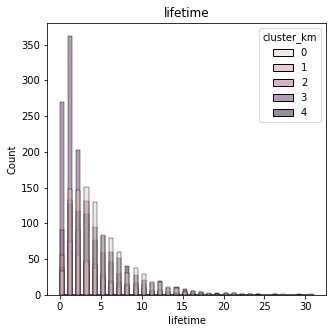

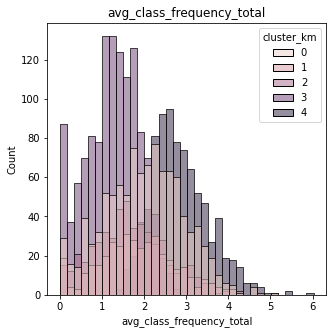

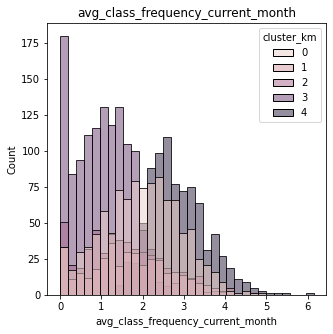

In [24]:
for column in dig_column:
    plt.figure(figsize=(5, 5))
    sns.histplot(data=df, x=column, hue="cluster_km")
    sns.set_palette('Set1')
    plt.title(column)
    plt.show()

**Вывод**

- По близости жилья выделается третий кластер, так как в нем все люди живут близко. 
- По партнерству конечно выделяется нулевой кластер.
- По телефоному номеру выделяется первый кластер, в котором нет людей, которые его оставили
- В третьем кластере люди не любят групповые занятия 

**6.Для каждого полученного кластера посчитаем долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?**

In [25]:
df.groupby('cluster_km').agg({'churn':'mean'})

,churn
cluster_km,
0,0.027723
1,0.267532
2,0.443564
3,0.514263
4,0.068019


Как мы видим, самая большая доля оттока у 3 кластера, затем идет второй кластер и первый. Самая маленькая доля оттока у нулевого кластера.

# Сформулируем выводы и сделайте базовые рекомендации по работе с клиентами

Перед началом исследования была проведена предобработка данных, мы привели названия столбцов к нижнему регистру, проверили на дубликаты и заменили типы данных некоторых столбцов.

Далее рассмотрели средние значения и стандартные отклонения во всех столбцах.

При прогнозировании оттока клиентов фитнес-зала использовали модели логистической регрессии и случайный лес. Обе модели имели высокие показатели, но модель логистической регрессии оказалась чуть лучше.

Также провели кластеризацию клиентов фитнес-зала. Было решено разделить на 5 кластеров. Получилось следующее:
1) В нулевом кластере в основном люди которые живут близко, имеют годовой абонемент и являются партнерамию. Также данный кластер имеет самый низкий отток клиентов.

2) В первом кластере находятся все люди, которые не оставили номер телефона

3) Во втором кластере с долей оттока 44% люди живут далеко от фитнес-зала и не использовали акцию

4) В третьем кластере с самой высокой долей оттока(51%) ходят всего раз в неделю, причем преимущественно это молодые люди, которые не являются партнерами

5) В четвертом кластере с маленькой долей оттока(6%) возможно находятся профессиональные спортсмены или те, кто очень любит фитнес, так как они ходят больше 3 раз в неделю.

**Рекомендации:**
- Привлекать клиентов через промоакции
- Привлекать более взрослых людей
- Стараться делать акцент на абонементах от 6 месяцев
- Включить пробные групповые занятия, которые могут завлечь клиента еще больше
- Больше ориентироваться на клиентов, которые живут рядом
- 